## Face Recognition Using Azure Face and Video Analyzer Services
- Here, we use Azure Video Analyzer service to process video
- And Azure Face API service to get face from the digital ID

### Imports

In [1]:
import io
import datetime
import pandas as pd
from PIL import Image
import requests
import io
import glob, os, sys, time, uuid

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

from urllib.parse import urlparse
from io import BytesIO
from PIL import Image, ImageDraw

from video_indexer import VideoIndexer
from azure.cognitiveservices.vision.face import FaceClient
from azure.cognitiveservices.vision.face.models import TrainingStatusType
from msrest.authentication import CognitiveServicesCredentials

In [2]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())

True

### Extract Face from Video

In [3]:
# resources
CONFIG = {
    'SUBSCRIPTION_KEY': os.getenv('SUBSCRIPTION_KEY'),
    'LOCATION': os.getenv('LOCATION'),
    'ACCOUNT_ID': os.getenv('ACCOUNT_ID')
}

video_analysis = VideoIndexer(
    vi_subscription_key=CONFIG['SUBSCRIPTION_KEY'],
    vi_location=CONFIG['LOCATION'],
    vi_account_id=CONFIG['ACCOUNT_ID']
)

In [4]:
video_analysis.check_access_token()

Getting video indexer access token...
Access Token: eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCJ9.eyJWZXJzaW9uIjoiMi4wLjAuMCIsIktleVZlcnNpb24iOiJlMzEzZDcxYmJmYTM0YzQyYjM2NDg5ZWM3NDczMTNmMSIsIkFjY291bnRJZCI6Ijc2ZDQzZTU1LTA3MmItNDFkNS1hYTFjLTZmNTI5ZWJmYzk0NiIsIkFjY291bnRUeXBlIjoiVHJpYWwiLCJQZXJtaXNzaW9uIjoiQ29udHJpYnV0b3IiLCJFeHRlcm5hbFVzZXJJZCI6IjU4Mjk3MDk0MDdGRDQxMTRBNTQ2RkQ0NDFGOTk0RUI1IiwiVXNlclR5cGUiOiJNaWNyb3NvZnRDb3JwQWFkIiwiSXNzdWVyTG9jYXRpb24iOiJUcmlhbCIsIm5iZiI6MTY5NDMyMTk1NiwiZXhwIjoxNjk0MzI1ODU2LCJpc3MiOiJodHRwczovL2FwaS52aWRlb2luZGV4ZXIuYWkvIiwiYXVkIjoiaHR0cHM6Ly9hcGkudmlkZW9pbmRleGVyLmFpLyJ9.VdqsLHWdRasf0ry9yHN_aUAE8vQ8TQvt_bFQ-4th0embLC2l9FrzeSLVo5fSnDGyvLCa_xhMbbh8NwjVS6UAhhDwkB9uZbG_kQWY_I_EbJp7BbWlIqrWreBWTNEqOvQYS2RODisfnNXMdswS8UKu98hMgPVw6RYUto7n_NoxR2U7rHUO0r_6xj7cuKJq47YwNcXs7rxk5OYnN8syKKg9n4KSn6TqjUuY8A7GgYS1yHor70NSjB5VAscYt2cVS-asA2U_VzSY88z7ELSeb93_oBAal3dvm9Q8Ax-seq9VV4G9pGm1pngHLF-TKKv5VFDDYciYOgwsxcnZGYYtdI6qBQ


In [5]:
#Upload your 30-second video programmatically from your local source or machine
video_file_path = '../material_preparation_step/avkash-boarding-pass.mp4'

uploaded_video_id = video_analysis.upload_to_video_indexer(
    input_filename= video_file_path,
    video_name= "avkash-boarding-pass",
    video_language= 'English')

Uploading video to video indexer...


In [6]:
uploaded_video_id

'c022d2bd8f'

In [21]:
info = video_analysis.get_video_info(uploaded_video_id, video_language='English')

Getting video info for: c022d2bd8f


In [22]:
info

{'partition': None,
 'description': None,
 'privacyMode': 'Private',
 'state': 'Processed',
 'accountId': '76d43e55-072b-41d5-aa1c-6f529ebfc946',
 'id': 'c022d2bd8f',
 'name': 'avkash-boarding-pass',
 'userName': 'Mohamed 9601413',
 'created': '2023-09-10T05:05:10.8266667+00:00',
 'isOwned': True,
 'isEditable': True,
 'isBase': True,
 'durationInSeconds': 26,
 'duration': '0:00:26.499856',
 'summarizedInsights': {'name': 'avkash-boarding-pass',
  'id': 'c022d2bd8f',
  'privacyMode': 'Private',
  'duration': {'time': '0:00:26.499856', 'seconds': 26.5},
  'thumbnailVideoId': 'c022d2bd8f',
  'thumbnailId': '0cdb2ca8-735d-4881-a5aa-06d2ef5c1506',
  'faces': [{'videoId': 'c022d2bd8f',
    'confidence': 0,
    'description': None,
    'title': None,
    'thumbnailId': '9f5e766c-33b4-453e-bb46-ecda8f1d0499',
    'seenDuration': 26.5,
    'seenDurationRatio': 1,
    'id': 1000,
    'name': 'Unknown #1',
    'appearances': [{'startTime': '0:00:00',
      'endTime': '0:00:26.4998556',
      'st

In [23]:
video_analysis.get_video_info(uploaded_video_id)

Getting video info for: c022d2bd8f


{'partition': None,
 'description': None,
 'privacyMode': 'Private',
 'state': 'Processed',
 'accountId': '76d43e55-072b-41d5-aa1c-6f529ebfc946',
 'id': 'c022d2bd8f',
 'name': 'avkash-boarding-pass',
 'userName': 'Mohamed 9601413',
 'created': '2023-09-10T05:05:10.8266667+00:00',
 'isOwned': True,
 'isEditable': True,
 'isBase': True,
 'durationInSeconds': 26,
 'duration': '0:00:26.499856',
 'summarizedInsights': {'name': 'avkash-boarding-pass',
  'id': 'c022d2bd8f',
  'privacyMode': 'Private',
  'duration': {'time': '0:00:26.499856', 'seconds': 26.5},
  'thumbnailVideoId': 'c022d2bd8f',
  'thumbnailId': '0cdb2ca8-735d-4881-a5aa-06d2ef5c1506',
  'faces': [{'videoId': 'c022d2bd8f',
    'confidence': 0,
    'description': None,
    'title': None,
    'thumbnailId': '9f5e766c-33b4-453e-bb46-ecda8f1d0499',
    'seenDuration': 26.5,
    'seenDurationRatio': 1,
    'id': 1000,
    'name': 'Unknown #1',
    'appearances': [{'startTime': '0:00:00',
      'endTime': '0:00:26.4998556',
      'st

In [24]:
#face thumbnails in the video
if len(info['videos'][0]['insights']['faces'][0]['thumbnails']):
    print("We found {} faces in this video.".format(str(len(info['videos'][0]['insights']['faces'][0]['thumbnails']))))

We found 6 faces in this video.


In [25]:
info['videos'][0]['insights']['faces'][0]['thumbnails']

[{'id': 'fa35ea46-d4f8-4475-8d49-3b8ae31d578e',
  'fileName': 'FaceInstanceThumbnail_fa35ea46-d4f8-4475-8d49-3b8ae31d578e.jpg',
  'instances': [{'adjustedStart': '0:00:00',
    'adjustedEnd': '0:00:00.0335195',
    'start': '0:00:00',
    'end': '0:00:00.0335195'}]},
 {'id': 'f9333097-2c26-4499-883e-d16f5ce22aa3',
  'fileName': 'FaceInstanceThumbnail_f9333097-2c26-4499-883e-d16f5ce22aa3.jpg',
  'instances': [{'adjustedStart': '0:00:05.2494777',
    'adjustedEnd': '0:00:05.2829972',
    'start': '0:00:05.2494777',
    'end': '0:00:05.2829972'}]},
 {'id': 'ca72d63e-3fbb-457b-8e82-d315610380ac',
  'fileName': 'FaceInstanceThumbnail_ca72d63e-3fbb-457b-8e82-d315610380ac.jpg',
  'instances': [{'adjustedStart': '0:00:10.3860333',
    'adjustedEnd': '0:00:10.4195528',
    'start': '0:00:10.3860333',
    'end': '0:00:10.4195528'}]},
 {'id': 'fb677c3e-aa7b-43c1-833d-46c8b7d67d2d',
  'fileName': 'FaceInstanceThumbnail_fb677c3e-aa7b-43c1-833d-46c8b7d67d2d.jpg',
  'instances': [{'adjustedStart': '0

In [26]:
#Extract face thumbnails from the video
images = []
img_raw = []
img_strs = []
for each_thumb in info['videos'][0]['insights']['faces'][0]['thumbnails']:
    if 'fileName' in each_thumb and 'id' in each_thumb:
        file_name = each_thumb['fileName']
        thumb_id = each_thumb['id']
        img_code = video_analysis.get_thumbnail_from_video_indexer(video_id= uploaded_video_id, thumbnail_id= thumb_id)
        img_strs.append(img_code)
        img_stream = io.BytesIO(img_code)
        img_raw.append(img_stream)
        img = Image.open(img_stream)
        images.append(img)

Getting thumbnail from video: c022d2bd8f, thumbnail: fa35ea46-d4f8-4475-8d49-3b8ae31d578e
Getting thumbnail from video: c022d2bd8f, thumbnail: f9333097-2c26-4499-883e-d16f5ce22aa3
Getting thumbnail from video: c022d2bd8f, thumbnail: ca72d63e-3fbb-457b-8e82-d315610380ac
Getting thumbnail from video: c022d2bd8f, thumbnail: fb677c3e-aa7b-43c1-833d-46c8b7d67d2d
Getting thumbnail from video: c022d2bd8f, thumbnail: 5dce7cd5-408d-4ba3-b11e-0a5121b9873a
Getting thumbnail from video: c022d2bd8f, thumbnail: 9f5e766c-33b4-453e-bb46-ecda8f1d0499


{'comment': b'Lavc59.37.100\x00'}
{'comment': b'Lavc59.37.100\x00'}
{'comment': b'Lavc59.37.100\x00'}
{'comment': b'Lavc59.37.100\x00'}
{'comment': b'Lavc59.37.100\x00'}
{'comment': b'Lavc59.37.100\x00'}


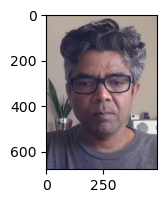

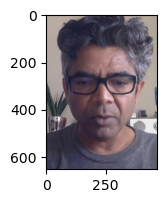

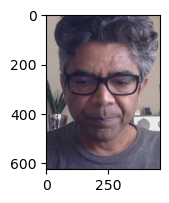

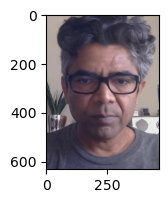

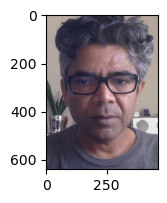

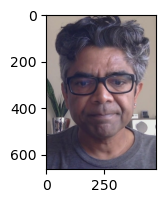

In [27]:
# Plot the images
for img in images:
    print(img.info)
    plt.figure(figsize=(4, 2))
    plt.imshow(img)

In [28]:
# Save the images
i = 1
for img in images:
    print(type(img))
    img.save('video-analyzer-face' + str(i) + '.jpg')
    i= i+ 1

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [29]:
!dir video-analyzer-face*.jpg

video-analyzer-face1.jpg  video-analyzer-face3.jpg  video-analyzer-face5.jpg
video-analyzer-face2.jpg  video-analyzer-face4.jpg  video-analyzer-face6.jpg


### Create a Person model by combining various face frames

In [30]:
face_serv_endpoint = os.getenv('FACE_SERV_ENDPOINT')
face_serv_key = os.getenv('FACE_SERV_KEY')

In [31]:
# Create a face client
face_client = FaceClient(face_serv_endpoint, CognitiveServicesCredentials(face_serv_key))
face_client.api_version

'1.0'

In [32]:
# person group information
PERSON_GROUP_ID = str(uuid.uuid4())
person_group_name = 'avkash-apbk'
print(PERSON_GROUP_ID )

8b234ef9-c462-42fb-a60d-3947df18e754


In [33]:
def build_person_group(client, person_group_id, pgp_name):
    print('Create and build a person group ...')
    # Create empty Person Group. Person Group ID must be lower case, alphanumeric, and/or with '-', '_'.
    print('Person group ID:', person_group_id)
    client.person_group.create(person_group_id = person_group_id, name=person_group_id)

    # Create a person group person.
    human_person = client.person_group_person.create(person_group_id, pgp_name)
    # Find all jpeg human images in working directory.
    human_face_images = [file for file in glob.glob('*.jpg') if file.startswith("video-analyzer-face")]
    # Add images to a Person object
    for image_p in human_face_images:
        with open(image_p, 'rb') as w:
            client.person_group_person.add_face_from_stream(person_group_id, human_person.person_id, w)

    # Train the person group, after a Person object with many images were added to it.
    client.person_group.train(person_group_id)

    # Wait for training to finish.
    while (True):
        training_status = client.person_group.get_training_status(person_group_id)
        print("Training status: {}.".format(training_status.status))
        if (training_status.status is TrainingStatusType.succeeded):
            break
        elif (training_status.status is TrainingStatusType.failed):
            client.person_group.delete(person_group_id=PERSON_GROUP_ID)
            sys.exit('Training the person group has failed.')
        time.sleep(5)

In [34]:
build_person_group(face_client, PERSON_GROUP_ID, person_group_name)

Create and build a person group ...
Person group ID: 8b234ef9-c462-42fb-a60d-3947df18e754
Training status: succeeded.


In [35]:
# Detect all faces in query image list, then add their face IDs to a new list.
def detect_faces(client, query_images_list):
    print('Detecting faces in query images list...')

    face_ids = {} # Keep track of the image ID and the related image in a dictionary
    for image_name in query_images_list:
        image = open(image_name, 'rb') # BufferedReader
        print("Opening image: ", image.name)
        time.sleep(5)

        # Detect the faces in the query images list one at a time, returns list[DetectedFace]
        faces = client.face.detect_with_stream(image)  

        # Add all detected face IDs to a list
        for face in faces:
            print('Face ID', face.face_id, 'found in image', os.path.splitext(image.name)[0]+'.jpg')
            # Add the ID to a dictionary with image name as a key.
            # This assumes there is only one face per image (since you can't have duplicate keys)
            face_ids[image.name] = face.face_id

    return face_ids

In [36]:
test_images = [file for file in glob.glob('*.jpg') if file.startswith("video-analyzer-face")]

In [37]:
face_ids = detect_faces(face_client, test_images)

Detecting faces in query images list...
Opening image:  video-analyzer-face5.jpg
Face ID a212a116-7962-4569-832e-18fddd37c81a found in image video-analyzer-face5.jpg
Opening image:  video-analyzer-face3.jpg
Face ID 9b9225a5-f9e0-4466-bd4d-07ab207b751d found in image video-analyzer-face3.jpg
Opening image:  video-analyzer-face6.jpg
Face ID 96422eb4-40bb-46f7-b0c1-4bae5559f37b found in image video-analyzer-face6.jpg
Opening image:  video-analyzer-face4.jpg
Face ID d1101741-40c5-4c63-8349-556c1ea00fca found in image video-analyzer-face4.jpg
Opening image:  video-analyzer-face1.jpg
Face ID 9a4cbe3c-3350-4fe4-b7c9-937587ffd466 found in image video-analyzer-face1.jpg
Opening image:  video-analyzer-face2.jpg
Face ID b3871139-8659-4a9f-9555-d5bbaef28bbe found in image video-analyzer-face2.jpg


In [38]:
# Verification example for faces of the same person.
verify_result = face_client.face.verify_face_to_face(face_ids['video-analyzer-face5.jpg'], face_ids['video-analyzer-face3.jpg'])

In [39]:
if verify_result.is_identical:
    print("Faces are of the same (Positive) person, similarity confidence: {}.".format(verify_result.confidence))
else:
    print("Faces are of different (Negative) persons, similarity confidence: {}.".format(verify_result.confidence))

Faces are of the same (Positive) person, similarity confidence: 0.94797.


### Extract Face from Digital-ID

In [40]:
digital_id_path = '../material_preparation_step/digital_id/ca-dl-avkash-chauhan.png'
with open(digital_id_path, "rb") as f:
    face_from_id = face_client.face.detect_with_stream(f) 

In [41]:
for face in face_from_id:
    print('Face ID', face.face_id, 'found in image', face_from_id)
    # Add the ID to a dictionary with image name as a key.
    # This assumes there is only one face per image (since you can't have duplicate keys)
    face_ids['Digital_ID_avkash_chauhan.png'] = face.face_id

Face ID ff27959a-bfec-43e9-96e2-7bce20af0434 found in image [<azure.cognitiveservices.vision.face.models._models_py3.DetectedFace object at 0x7f815e0b8910>]


### Matching Face ID from the identity card with Video Analyzer Person Model

##### Make face-to-face verification between the Digital-ID-Face and all faces extracted from the video model
- && where the confidence should be above 0.75

In [42]:
for i in range(1, len(face_ids)):
    dl_verify_result = face_client.face.verify_face_to_face(face_ids['video-analyzer-face{}.jpg'.format(i)], face_ids['Digital_ID_avkash_chauhan.png'])
    if dl_verify_result.is_identical and dl_verify_result.confidence >= 0.75:
        print("video-analyzer-face{}.jpg, faces are of the same (Positive) person, similarity confidence: {}.".format(i, dl_verify_result.confidence))

video-analyzer-face1.jpg, faces are of the same (Positive) person, similarity confidence: 0.80208.
video-analyzer-face2.jpg, faces are of the same (Positive) person, similarity confidence: 0.7723.
video-analyzer-face3.jpg, faces are of the same (Positive) person, similarity confidence: 0.75331.
video-analyzer-face4.jpg, faces are of the same (Positive) person, similarity confidence: 0.80061.
video-analyzer-face5.jpg, faces are of the same (Positive) person, similarity confidence: 0.7865.
video-analyzer-face6.jpg, faces are of the same (Positive) person, similarity confidence: 0.75534.


### Using the Person Model to match the face from the video with the face extracted from the digital ID

In [43]:
person_gp_results = face_client.face.identify([face_ids['Digital_ID_avkash_chauhan.png']], PERSON_GROUP_ID)

In [44]:
for result in person_gp_results:
    if result.candidates:
        for candidate in result.candidates:
            print("The Identity match confidence is {}".format(candidate.confidence))
    else:
        print("Can't verify the identity with the person group")

The Identity match confidence is 0.80015


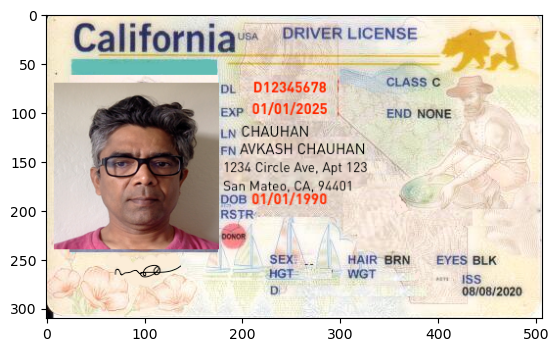

In [45]:
with open(digital_id_path, 'rb') as img_code:
    img_view_ready = Image.open(img_code)
    plt.figure()
    plt.imshow(img_view_ready)

### Extract Sentiment and Emotion from Video

In [49]:
info['summarizedInsights']['sentiments']

[{'sentimentKey': 'Neutral',
  'seenDurationRatio': 1,
  'appearances': [{'startTime': '0:00:00',
    'endTime': '0:00:26.499856',
    'startSeconds': 0,
    'endSeconds': 26.5}]}]

In [50]:
info['summarizedInsights']['emotions']

[]